<a href="https://colab.research.google.com/github/kaispace30098/Sentiment_analysis_on_amazon_review/blob/main/amazon_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
print('TensorFlow Version: {}'.format(tf.__version__))
from google.colab import files
import io
!pip install xlrd==2.0.1

TensorFlow Version: 2.8.0
     |████████████████████████████████| 96 kB 2.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
uploaded = files.upload()
def read_dir_file(case_f):  # case_f = 0 for uploading one File and case_f = 1 for uploading one Zipped Directory
        #uploaded = files.upload()    # to upload a Full Directory, please Zip it first (use WinZip)
        for fn in uploaded.keys():
            name = fn  #.encode('utf-8')
            #print('\nfile after encode', name)
            #name = io.BytesIO(uploaded[name])
        if case_f == 0:    # case of uploading 'One File only'
            print('\n file name: ', name)
            return name
        else:   # case of uploading a directory and its subdirectories and files
            zfile = zipfile.ZipFile(name, 'r')   # unzip the directory 
            zfile.extractall()
            for d in zfile.namelist():   # d = directory
                print('\n main directory name: ', d)
                return d
fileName = read_dir_file(0)
df0= pd.read_csv(io.BytesIO(uploaded[fileName]))
                         

Saving Reviews1.csv to Reviews1.csv

 file name:  Reviews1.csv


In [3]:
print(df0.shape)
df0.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:

# Remove null values and unneeded features

df0 = df0.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Summary','Time'], axis=1)
# Check for any nulls values
df0.isnull().sum()


Score    0
Text     0
dtype: int64

In [5]:
df1 = df0.dropna()
df1 = df1.reset_index(drop=True)

In [6]:
# Inspecting some of the reviews
for i in range(5):
    print("Review #",i+1)
    print(df1.Score[i])
    print(df1.Text[i])
    print()

Review # 1
5
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

Review # 2
1
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".

Review # 3
4
This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the W

In [7]:
df2=pd.DataFrame({'Text':['I just put a slice of leftover pizza in the air fryer and my life has just officially changed for the better.',
'Very dissapointed product, I nearly hurt myself by its hot pan. the door cannot sealed well.']})

df2['Score']=0


In [8]:
df3=pd.DataFrame()
df3=pd.concat([df1,df2])
df3.shape

(568456, 2)

In [9]:
#A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [10]:
#Clean texts:contraction words, punctuation, remove stop words
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
# Clean the summaries and texts
clean_texts = []
for text in df3.Text:
    clean_texts.append(clean_text(text))
print("Texts are complete.")

Texts are complete.


In [12]:
# Inspect the cleaned summaries and texts to ensure they have been cleaned well
for i in range(5):
    print("Clean Review #",i+1)
    
    print(clean_texts[i])
    print()

Clean Review # 1
bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better

Clean Review # 2
product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo

Clean Review # 3
confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c lewis lion witch wardrobe treat seduces edmund selling brother sisters witch

Clean Review # 4
looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal

Clean Review # 5
great taffy great price wide assortment yummy taffy delivery quick taffy lover deal



In [13]:
#@title Download the cleaned review in case
from google.colab import files
df1.to_csv('amazon_review_cleaned.csv',index=False) 
files.download('amazon_review_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
df3['clean_text']=clean_texts
df3=df3[['Score','clean_text']]
df3.tail()

,Score,clean_text
568451,5,stars small give 10 15 one training session tr...
568452,5,best treats training rewarding dog good groomi...
568453,5,satisfied product advertised use cereal raw vi...
0,0,put slice leftover pizza air fryer life offici...
1,0,dissapointed product nearly hurt hot pan door ...


In [15]:
def count_words(count_dict, text):
    '''Count the number of occurrences of each word in a set of text'''
    for sentence in text:
        for word in sentence.split():
            if word not in count_dict:
                count_dict[word] = 1
            else:
                count_dict[word] += 1

In [16]:
# Find the number of times each word was used and the size of the vocabulary
word_counts = {}

#count_words(word_counts, clean_summaries)
count_words(word_counts, clean_texts)
            
print("Size of Vocabulary:", len(word_counts))

Size of Vocabulary: 138989


In [17]:
from keras.preprocessing.text import Tokenizer
# convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=15000)
tokenizer.fit_on_texts(clean_texts)
sequences = tokenizer.texts_to_sequences(clean_texts)
# print("sequences:", sequences); exit()

In [18]:
# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 120267 unique tokens.


In [19]:
print("max sequence length:", max(len(s) for s in sequences))
print("min sequence length:", min(len(s) for s in sequences))
s = sorted(len(s) for s in sequences)
print("median sequence length:", s[len(s) // 2])

print("max word index:", max(max(seq) for seq in sequences if len(seq) > 0))

max sequence length: 1955
min sequence length: 0
median sequence length: 28
max word index: 14999


In [20]:
word2idx['fryer']

13988

In [21]:
MAX_VOCAB_SIZE=15000
EMBEDDING_DIM=150
MAX_SEQUENCE_LENGTH=100

In [22]:
###ANOTHER WAY OF TOKENIZER
#from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
#setup text vectorization variables
#max_vocab_length=10000
#max_length=30 
#text_vectorizer=TextVectorization(max_tokens=max_vocab_length,
#                                  output_mode="int",
#                                  output_sequence_length=max_length)

In [23]:
# pad sequences so that we get a N x T matrix
from keras.preprocessing.sequence import pad_sequences
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', data.shape)

Shape of data tensor: (568456, 100)


In [24]:
#ONLY AS NEEDED!!!!!
#import os as os
# load in pre-trained word vectors
#print('Loading word vectors...')
#word2vec = {}

#with open(os.path.join('/content/glove.6B.100d.txt'),encoding="utf8") as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
#  for line in f:
#    values = line.split()
#    word = values[0]
#    vec = np.asarray(values[1:], dtype='float32')
#    word2vec[word] = vec
#print('Found %s word vectors.' % len(word2vec))
############################################################
#print('Filling pre-trained embeddings...')
#num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
#embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
#for word, i in word2idx.items():
#if i < MAX_VOCAB_SIZE:
#   embedding_vector = word2vec.get(word)
#   if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
#      embedding_matrix[i] = embedding_vector

In [25]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
from tensorflow.keras.layers import Embedding
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  #weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)

In [26]:
# create an LSTM network with a single LSTM
from keras.layers import Dense, Input
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.models import Model 

input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
x = LSTM(24, return_sequences=True)(x)
#x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)



#############################################################################

In [27]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score

model = Model(input_, output)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


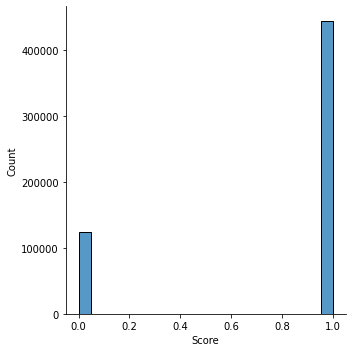

In [28]:
df4=df1
df4.Score=df4.Score.replace(1,0)
df4.Score=df4.Score.replace(2,0)
df4.Score=df4.Score.replace(3,0)
df4.Score=df4.Score.replace(4,1)
df4.Score=df4.Score.replace(5,1)
target=df4['Score'].values
target1=np.reshape(target,(target.shape[0],1)) #Turn the target labels into tensorflow's output format
sns.displot(df4.Score)

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 150)          2250000   
                                                                 
 lstm (LSTM)                 (None, 100, 24)           16800     
                                                                 
 global_max_pooling1d (Globa  (None, 24)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 2,266,825
Trainable params: 16,825
Non-trainable params: 2,250,000
______________________________________________

In [30]:
data1=data[:len(df4)]
#df1 contains all the review and scores from raw data
#df2 is made by the reviews for prediction
#df3 concatinate df1 and df2
#df4 contains all the scores from raw data but only good as 1 and bad as 0.

In [79]:
len(df4)

568454

In [31]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(data1, target1, test_size=0.15, shuffle=True)

In [32]:
history=model.fit(xtrain,ytrain,epochs=3,batch_size=16,validation_data=(xval,yval))

Epoch 1/3
30200/30200 [==============================] - 570s 19ms/step - loss: 0.3257 - accuracy: 0.8597 - val_loss: 0.2892 - val_accuracy: 0.8803
Epoch 2/3
30200/30200 [==============================] - 564s 19ms/step - loss: 0.2778 - accuracy: 0.8843 - val_loss: 0.2835 - val_accuracy: 0.8827
Epoch 3/3
30200/30200 [==============================] - 576s 19ms/step - loss: 0.2621 - accuracy: 0.8921 - val_loss: 0.2674 - val_accuracy: 0.8913


In [90]:
print("A new Review: ", df2['Text'].iloc[0])
pad_test_sentence2=np.reshape(data[-2],(1,data[-2].shape[0]))
if round(model.predict(pad_test_sentence2)[0][0],0)==1:
  print("It is a good review")
else:
  print("It is bad review")

A new Review:  I just put a slice of leftover pizza in the air fryer and my life has just officially changed for the better.
It is a good review
